<a href="https://colab.research.google.com/github/invest41/Studying_Reactions_to_VACCINES/blob/main/Studying_Reactions_To_VACCINES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis on documented adverse effects of Vaccination**

- Set up environment

In [ ]:
#6:30pm 17-02-2021
#Creating the right environment - Library and Module Import
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
 
from sklearn.metrics import accuracy_score as acsc
from sklearn.model_selection import train_test_split as tts
import joblib, time
import string, nltk
print('Environment is set...')

Environment is set...


- General Vaccination Data Analysis and Visualization

In [ ]:
#6:37pm 17-02-2021
#Data Cleaning
 
#1.0
orig_df = pd.read_csv('2021_adverse_vaccine.csv')
df = orig_df.copy()
print(f'Dataset Headers:\n{df.columns}')
 
#2.0 - Represent the Dimorphic Sex
df['SEX'][df['SEX']=='male'], df['SEX'][df['SEX']=='female'] = 1, 0
 
#3.0 - Circumvent Errors
df = df.fillna(0)
df = df.replace('N', 0)
df = df.replace('Y', 1)
df = df.replace('U', 0.5)
df = df.replace('F', 0)
df = df.replace('M', 1)

Dataset Headers:
Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Number of People')

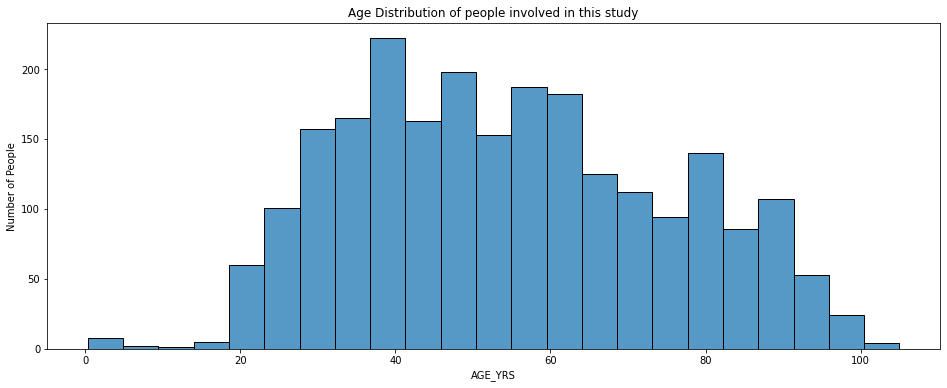

In [245]:
plt.figure(figsize=(16,6))
sns.histplot(df['AGE_YRS'][df['AGE_YRS']>0])
plt.title('Age Distribution of people involved in this study')
plt.ylabel('Number of People')

Text(0, 0.5, 'Number of People')

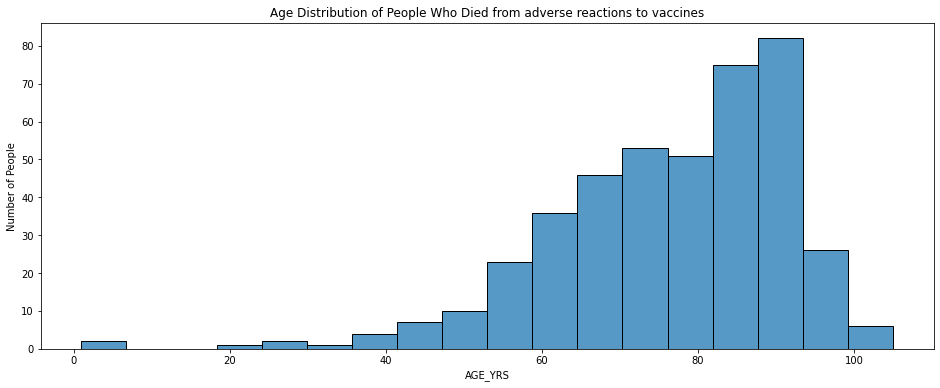

In [ ]:
#Studying the death Factors
death_df = df[df['DIED']==1]
 
 
dist = death_df[death_df['AGE_YRS']>0]
plt.figure(figsize=(16,6))
sns.histplot(dist['AGE_YRS'])
plt.title('Age Distribution of People Who Died from adverse reactions to vaccines')
plt.ylabel('Number of People')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Death per State')

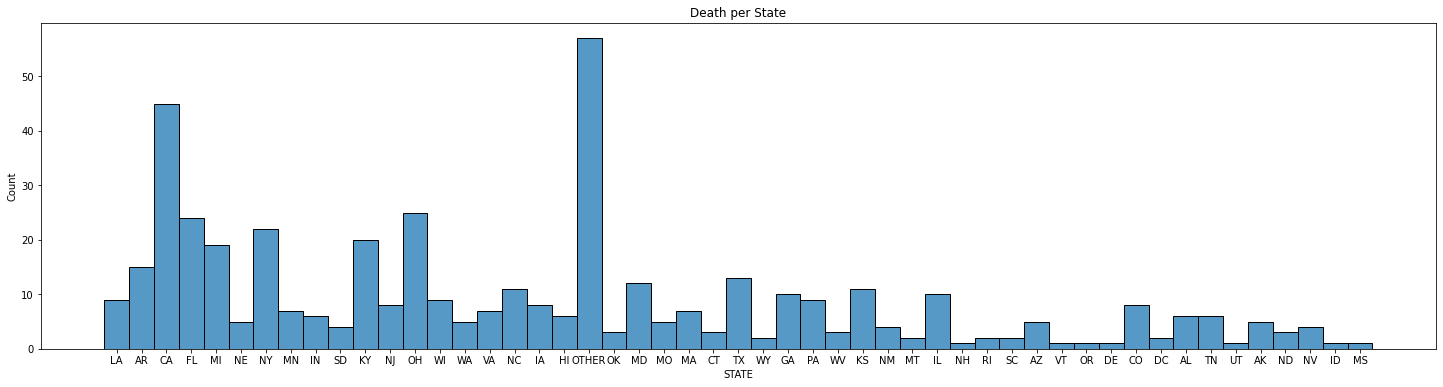

In [ ]:
plt.figure(figsize=(25,6))
death_df['STATE'] = orig_df['STATE'].fillna('OTHER')

sns.histplot(death_df['STATE'])
plt.title('Death per State')

Text(0.5, 0, 'STATE')

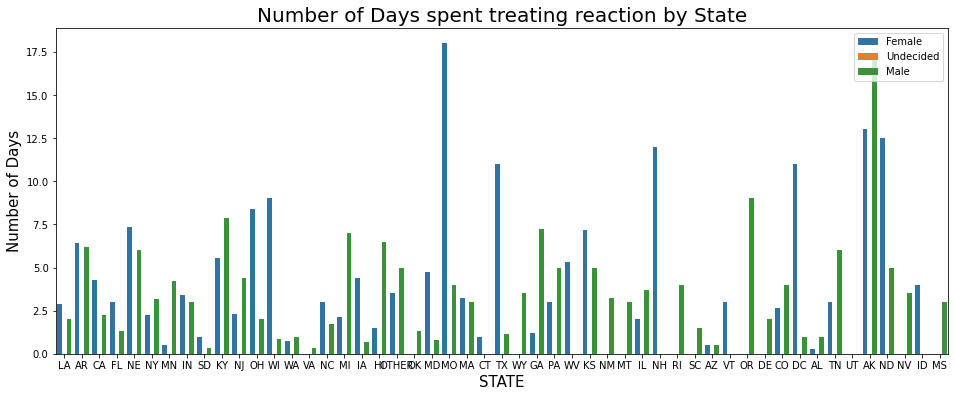

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x='STATE', y='NUMDAYS',hue='SEX', data = death_df[death_df['NUMDAYS']<100], ci = None)
plt.legend(['Female','Undecided','Male'], loc='upper right')
plt.title('Number of Days spent treating reaction by State',fontsize=20)
plt.ylabel('Number of Days',fontsize=15)
plt.xlabel('STATE',fontsize=15)

In [ ]:
#Analysis of patient history
#Data formating
 
nltk.download('words')
fwl = nltk.corpus.words.words()
 
def transcribe(word,p):
    code = word.maketrans(p,' ','')
    return word.translate(code)
dct, lst1, lst2 = {}, [], []
 
for line in [ str(his)+',' for his in list(death_df['HISTORY'].values)]:
  line = line.split(',')
  for word in line:
    word = word.strip()
    for p in string.punctuation:
        if p in word: 
          word = transcribe(word, p)
 
    word = word.strip('\n 0').capitalize()
    if not (word==" " and word.capitalize()=="None"): 
      #if word in fwl:
       if 50>len(word)>4: 
        dct[word] = dct.get(word, 0) + 1
co = 0
for v,k in sorted([(v,k) for k,v in dct.items()], reverse=True):
  co+=1
  if co==1: continue
  lst1.append(k)
  lst2.append(v)
 
p_history = pd.DataFrame({'Personal_history':lst1,'Frequency':lst2}).replace('',)
 
print('\nDataset Ready - p_history')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!

Dataset Ready - p_history


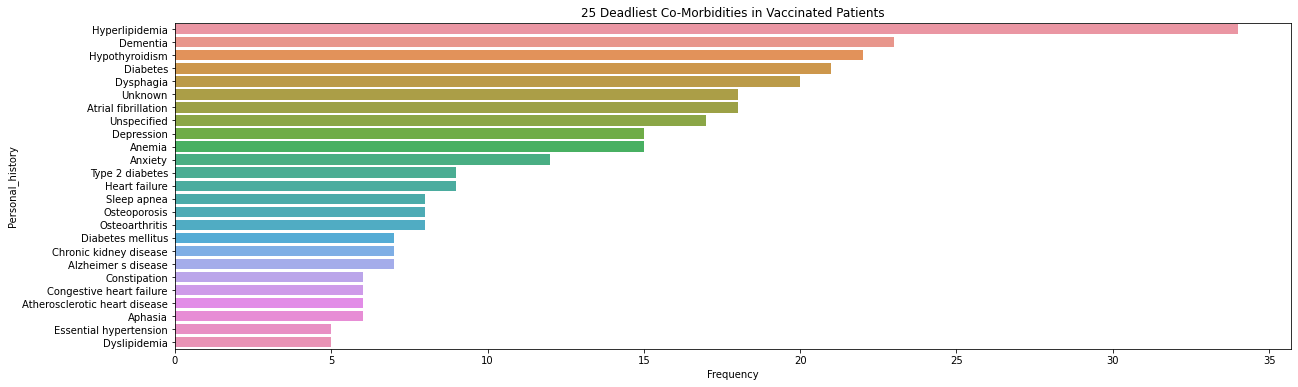

<Figure size 1152x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='Frequency', y='Personal_history', data=p_history.head(25)) 
plt.title('25 Deadliest Co-Morbidities in Vaccinated Patients')
plt.figure(figsize=(16,10))
plt.savefig('deadly_co-morbidities.png')

In [ ]:
df.head(2)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916710,01/01/2021,MO,23.0,23.0,0.0,0.0,0,"Acute appendicitis, onset morning of 1/1/2021 ...",0,0,1,0.0,1,0.0,0,0,0.5,12/29/2020,01/01/2021,3.0,"WBCs 13k, 4% Bands, CT with acute appendicitis...",PVT,0,Synthroid,0,Hypothyroidism,0,0,2,01/01/2021,0,0,1,NKDA
1,916741,01/01/2021,AR,68.0,68.0,0.0,0.0,0,"on dec 22 I felt some myalgias, chills, fatigu...",0,0,0,0.0,0,0.0,0,1,0.0,12/21/2020,12/22/2020,1.0,Dec 29th - saw surgeon. had xray and exam --d...,PVT,0,phenobarbital 60mg HS hydroxychloroquin 400mg...,had surgery R hand for advanced arthritis 11/1...,Rheumatoid arthritis - mostly affecting R wris...,0,0,2,01/01/2021,0,0,0,bee stings


In [ ]:
#Merge to full Dataset
adj = pd.read_csv('2021VAERSSYMPTOMS.csv')
par_new_df = orig_df.merge(adj,on='VAERS_ID')
adj2 = pd.read_csv('2021VAERSVAX.csv')
new_df = par_new_df.merge(adj2,on='VAERS_ID')
print('Dataset ready - new_df')

Dataset ready - new_df


In [ ]:
 #1.0
copy_new_df = new_df.copy()
print(f'Dataset Headers:\n{new_df.columns}')
 
#2.0 - Represent the Dimorphic Sex
new_df['SEX'][new_df['SEX']=='male'], new_df['SEX'][new_df['SEX']=='female'] = 1, 0
 
#3.0 - Circumvent Errors
new_df = new_df.fillna(0)
new_df = new_df.replace('N', 0)
new_df = new_df.replace('Y', 1)
new_df = new_df.replace('U', 0.5)
new_df = new_df.replace('F', 0)
new_df = new_df.replace('M', 1)

Dataset Headers:
Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE',
       'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#Exploratory Data Analysis and Visualization
**- COVID19 VACCINE**

Text(0.5, 0, 'STATE')

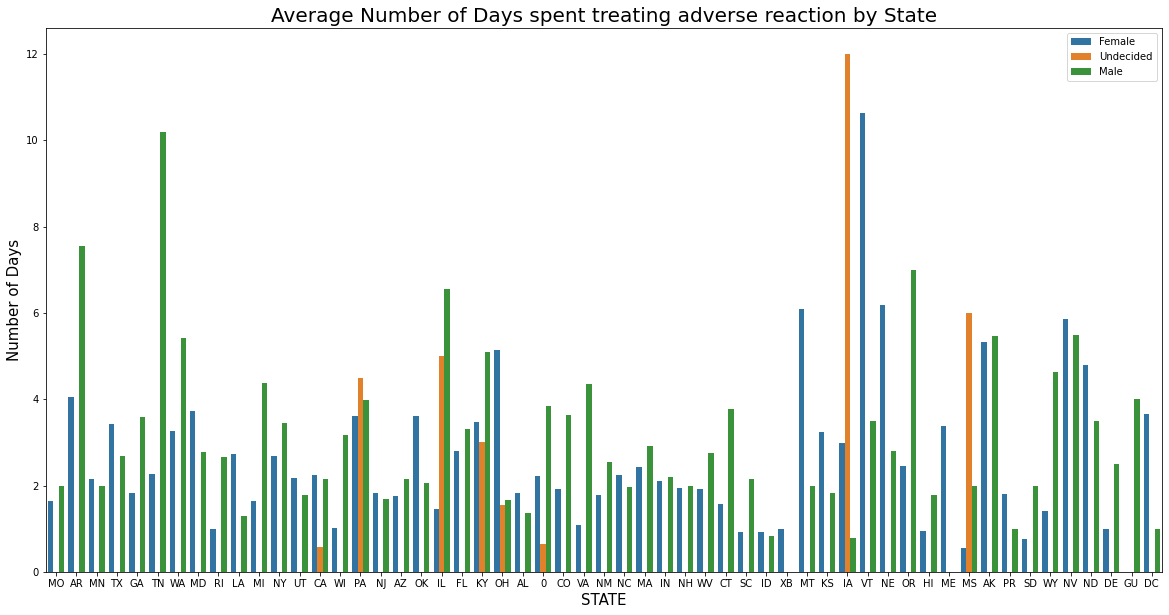

In [ ]:
#1.0
corona_vac_df = new_df[new_df['VAX_TYPE']=='COVID19']
 
#2.0
plt.figure(figsize=(20,10))
sns.barplot(x='STATE', y='NUMDAYS',hue='SEX', data = corona_vac_df[corona_vac_df['NUMDAYS']<100], ci = None)
plt.legend(['Female','Undecided','Male'], loc='upper right')
plt.title('Average Number of Days spent treating adverse reaction by State',fontsize=20)
plt.ylabel('Number of Days',fontsize=15)
plt.xlabel('STATE',fontsize=15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 0, 'STATE')

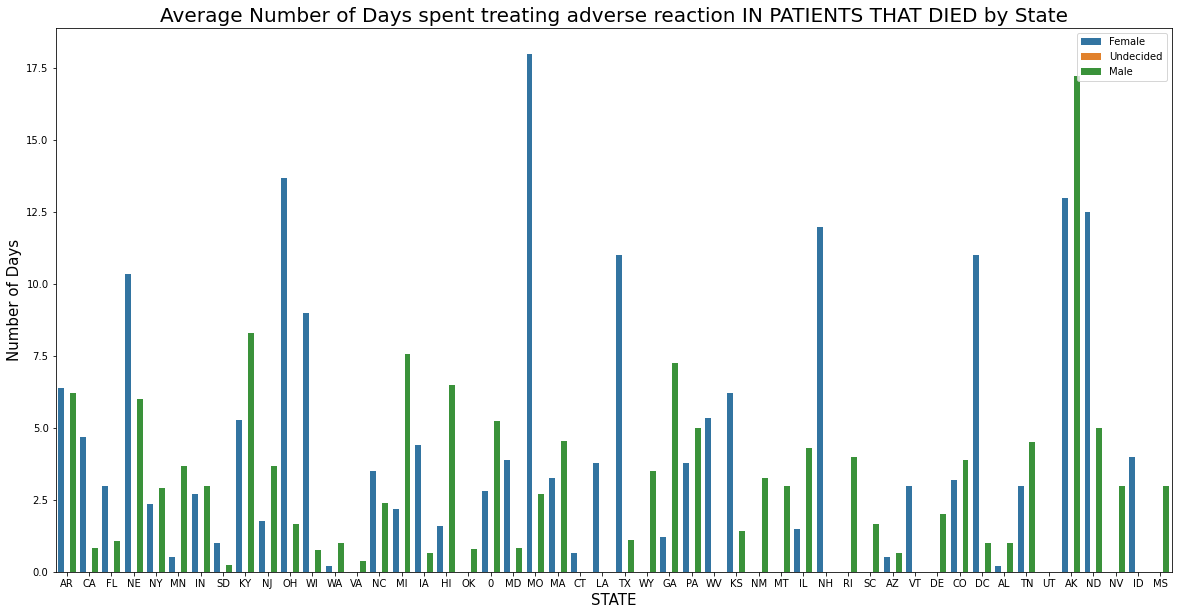

In [ ]:
 #1.0
corona_vac_df = new_df[new_df['VAX_TYPE']=='COVID19']
 
#2.0
plt.figure(figsize=(20,10))
sns.barplot(x='STATE', y='NUMDAYS',hue='SEX', data = corona_vac_df[corona_vac_df['NUMDAYS']<100][new_df['DIED']==1], ci = None)
plt.legend(['Female','Undecided','Male'], loc='upper right')
plt.title('Average Number of Days spent treating adverse reaction IN PATIENTS THAT DIED by State',fontsize=20)
plt.ylabel('Number of Days',fontsize=15)
plt.xlabel('STATE',fontsize=15)

In [ ]:
#corona_vac_df[['ALLERGIES']][new_df['DIED']==1].value_counts().head(25).plot.bar()
 
#Analysis of the allergy history of reactive patients, generally and for the Dead
#Data formating
 
nltk.download('words')
fwl = nltk.corpus.words.words()
 
def transcribe(word,p):
    code = word.maketrans(p,' ','')
    return word.translate(code)
 
comp = list(corona_vac_df['VAX_MANU'].unique())
cou = 0
for corp in comp:
  cou+=1
  dct3, lst5, lst6, turn = {}, [], [], 0
  for cat in [[ str(his)+',' for his in list(corona_vac_df['ALLERGIES'][corona_vac_df['VAX_MANU']==f'{corp}'].values)],
               [ str(his)+',' for his in list(corona_vac_df['ALLERGIES'][corona_vac_df['DIED']==1][corona_vac_df['VAX_MANU']==f'{corp}'].values)]]:
               
               for line in cat:
                 for word in line.split(','):
                   word = word.strip()
                   for p in string.punctuation:
                     if p in word:
                       word = transcribe(word, p)
                   word = word.strip('\n 0').capitalize()
                   if not (word==" " and word.capitalize()=="None"):
                     #if word in fwl:
                     if 50>len(word)>4:
                       if word=='Penicillins': word = 'Penicillin'
                       dct3[word] = dct3.get(word, 0) + 1
               co = 0
               for v,k in sorted([(v,k) for k,v in dct3.copy().items()], reverse=True):
                 co+=1
                 if co==1: continue
                 lst5.append(k)
                 lst6.append(v)
                 
               d = pd.DataFrame({'Allergy_history':lst5[:],'Frequency':lst6[:]}).replace('',)
 
               
               temp = '\nDatasets ready '
               if cou==1: 
                if turn==0:
                  alleg_moderna = d.copy()
                  dct3, lst5, lst6, turn = {}, [], [], 1
                  continue
                d_alleg_moderna = d.copy()
                print(temp + '- alleg_moderna, d_alleg_moderna')
               elif cou==2: 
                if turn==0:
                  alleg_pfizer_biontech = d.copy()
                  dct3, lst5, lst6, turn = {}, [], [], 1
                  continue
                d_alleg_pfizer_biontech = d.copy()
                print(temp + '- alleg_pfizer_biontech, d_alleg_pfizer_biontech')
               elif cou==3: 
                if turn==0:
                  alleg_unknown = d.copy()
                  dct3, lst5, lst6, turn = {}, [], [], 1
                  continue
                d_alleg_unknown = d.copy()
                print(temp + '- alleg_unknown, d_alleg_unknown')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!

Datasets ready - alleg_moderna, d_alleg_moderna

Datasets ready - alleg_pfizer_biontech, d_alleg_pfizer_biontech

Datasets ready - alleg_unknown, d_alleg_unknown


In [ ]:
#Manufacturers of the COVID19 vaccines studied
corona_vac_df['VAX_MANU'].unique()

array(['MODERNA', 'PFIZER\\BIONTECH', 'UNKNOWN MANUFACTURER'],
      dtype=object)

In [ ]:
#Dead patients' allergy history (Moderna section)
d_alleg_pfizer_biontech.head(10)

,Allergy_history,Frequency
0,Penicillin,17
1,Walnuts,12
2,Unknown,11
3,Codeine,8
4,Tramadol,6
5,None bee allergy listed in records,6
6,Nnone,6
7,Sulfa antibiotics,5
8,None known,5
9,Erythromycin,5


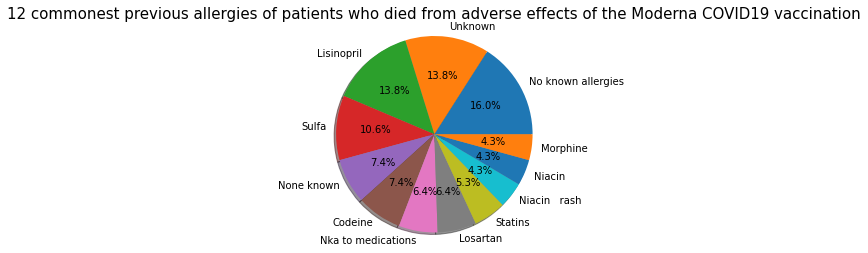

<Figure size 1440x720 with 0 Axes>

In [ ]:
 
labels1 = d_alleg_moderna['Allergy_history'].head(12)
sizes1 = d_alleg_moderna['Frequency'].head(12)
 
 
fig1, ax1 = plt.subplots()
 
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
 
 
 
plt.title('12 commonest previous allergies of patients who died from adverse effects of the Moderna COVID19 vaccination', fontsize=15)
 
plt.savefig("Deadly_Allergy_for_Moderna_Covid19_Vaccine_Chart.png")
plt.figure(figsize=(20,10))
plt.show()

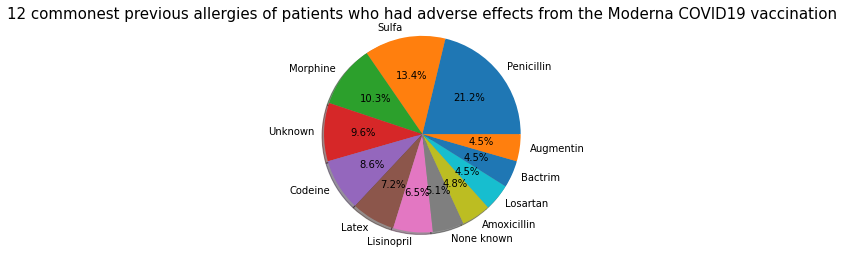

<Figure size 1440x720 with 0 Axes>

In [ ]:
labels2 = alleg_moderna['Allergy_history'].head(12)
sizes2 = alleg_moderna['Frequency'].head(12)
 
fig2, ax2 = plt.subplots()
 
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', shadow=True)
ax2.axis('equal')
 
 
plt.title('12 commonest previous allergies of patients who had adverse effects from the Moderna COVID19 vaccination', fontsize=15)
plt.savefig("Dangerous_Allergy_for_Moderna_Covid19_Vaccine_Chart.png")
plt.figure(figsize=(20,10))
plt.show()

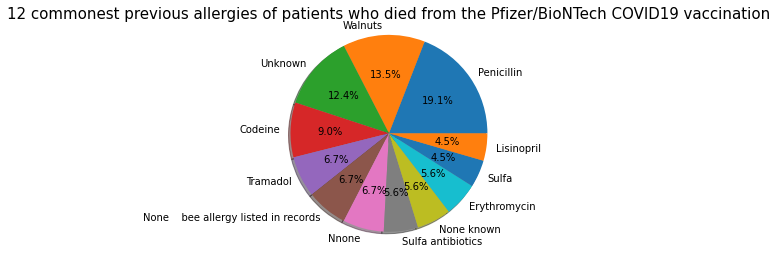

<Figure size 2160x1440 with 0 Axes>

In [ ]:
labels3 = d_alleg_pfizer_biontech['Allergy_history'].head(12)
sizes3 = d_alleg_pfizer_biontech['Frequency'].head(12)
 
 
fig3, ax = plt.subplots()
 
ax.pie(sizes3, labels=labels3, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
plt.title('12 commonest previous allergies of patients who died from the Pfizer/BioNTech COVID19 vaccination', fontsize=15)
plt.savefig("Deadly_Allergy_for_PNB_Covid19_Vaccine_Chart.png")
plt.figure(figsize=(30,20))
plt.show()

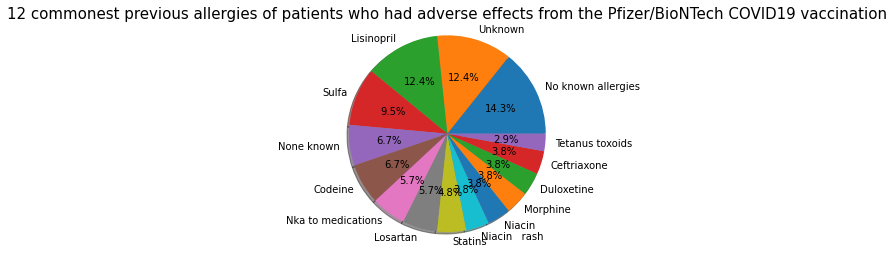

<Figure size 2160x1440 with 0 Axes>

In [ ]:
labels4 = alleg_pfizer_biontech['Allergy_history'].head(12)
sizes4 = alleg_pfizer_biontech['Frequency'].head(12)
 
 
fig4, ax = plt.subplots()
 
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
plt.title('12 commonest previous allergies of patients who had adverse effects from the Pfizer/BioNTech COVID19 vaccination', fontsize=15)
plt.savefig("Dangerous_Allergy_for_PNB_Covid19_Vaccine_Chart.png")
plt.figure(figsize=(30,20))
plt.show()

In [ ]:
#Dead patient assessment
 
#1.0
def transcribe(word,p):
    code = word.maketrans(p,' ','')
    return word.translate(code)
num = list(range(1,6))
#2.0
for n in num:
  dct2, lst7, lst8 = {}, [], []
  for i in corona_vac_df[f'SYMPTOM{n}'][new_df['DIED']==1]: 
    i = str(i).strip().capitalize()
    for p in string.punctuation:
        if p in i: 
          i = transcribe(i, p)
    if (not i.isdigit()) and (i.isalpha() or i.isalnum()): dct2[i] = dct2.get(i, 0) + 1
    
  #3.0
  co = 0
  for v,k in sorted([(v,k) for k,v  in dct2.copy().items()], reverse=True):
      co+=1
      if co==1: continue
      lst7.append(k)
      lst8.append(int(v))
  
  #4.0
  x = pd.DataFrame({f'Patient_Symptom_{n}':lst7[:], 'Frequency':lst8[:]})
  if n==1: p_sym_1_df = x.copy()
  elif n==2: p_sym_2_df = x.copy()
  elif n==3: p_sym_3_df = x.copy()
  elif n==4: p_sym_4_df = x.copy()
  elif n==5: p_sym_5_df = x.copy()
  print(f'Dataset Ready - p_sym_{n}_df')

Dataset Ready - p_sym_1_df
Dataset Ready - p_sym_2_df
Dataset Ready - p_sym_3_df
Dataset Ready - p_sym_4_df
Dataset Ready - p_sym_5_df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


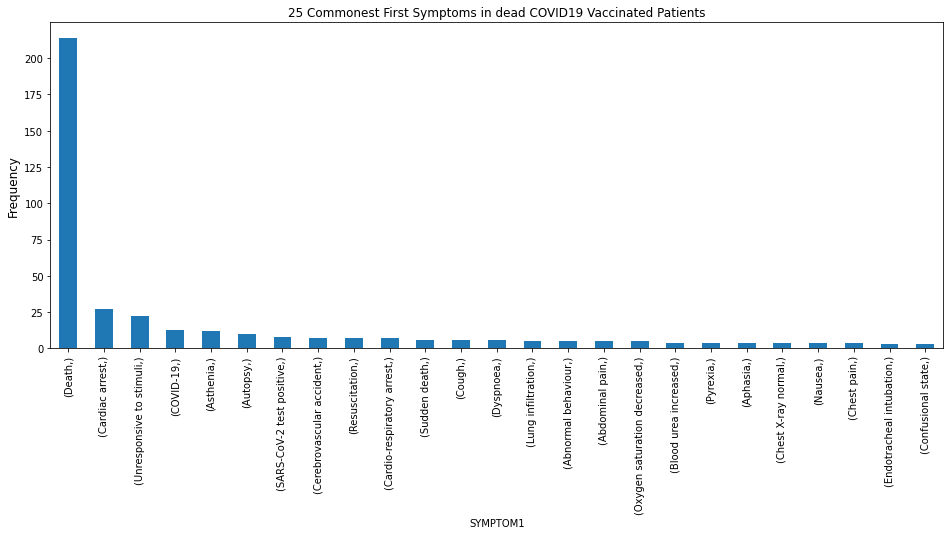

<Figure size 1152x720 with 0 Axes>

In [ ]:
 
nb,nam = 1, 'first'
plt.figure(figsize=(16,6))
 
corona_vac_df[['SYMPTOM1']][new_df['DIED']==1].value_counts().head(25).plot.bar()
 
 
plt.title(f'25 Commonest {nam.capitalize()} Symptoms in dead COVID19 Vaccinated Patients')
plt.ylabel('Frequency', fontsize=12)
plt.figure(figsize=(16,10))
plt.savefig(f'commonest_{nam.lower()}_symptoms{nb}.png')

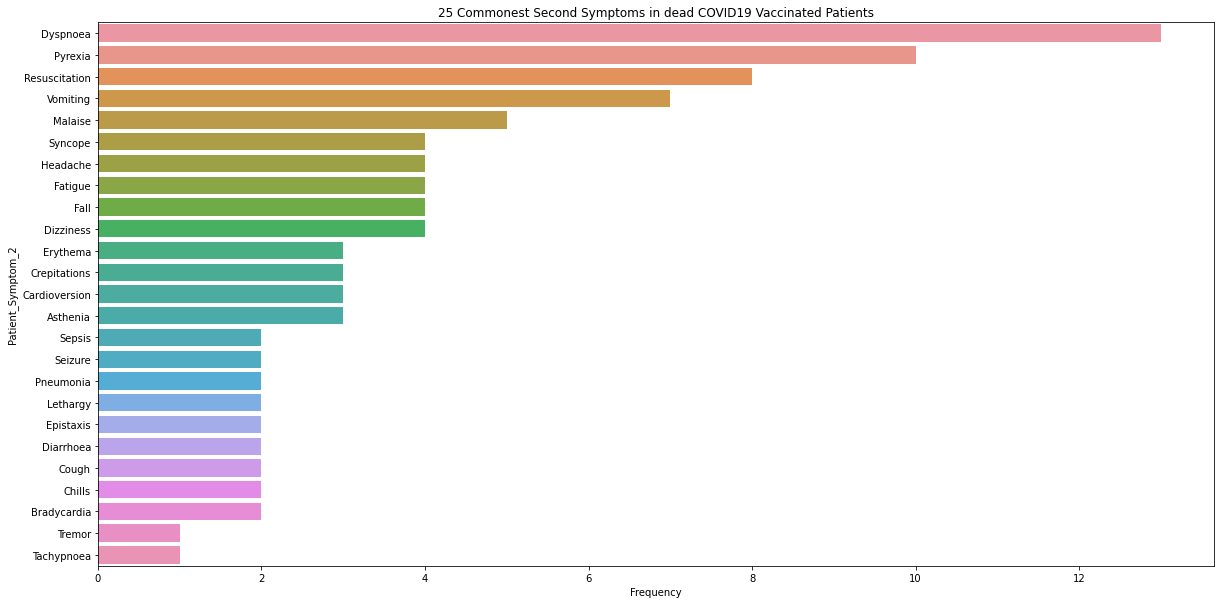

In [ ]:
 
 
nb,nam = 2, 'second'
plt.figure(figsize=(20,10))
sns.color_palette('mako',as_cmap=True)
sns.barplot(x='Frequency', y=f'Patient_Symptom_{nb}', data=p_sym_2_df.head(25))
plt.title(f'25 Commonest {nam.capitalize()} Symptoms in dead COVID19 Vaccinated Patients')
plt.savefig(f'commonest_{nam.lower()}_symptoms{nb}.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


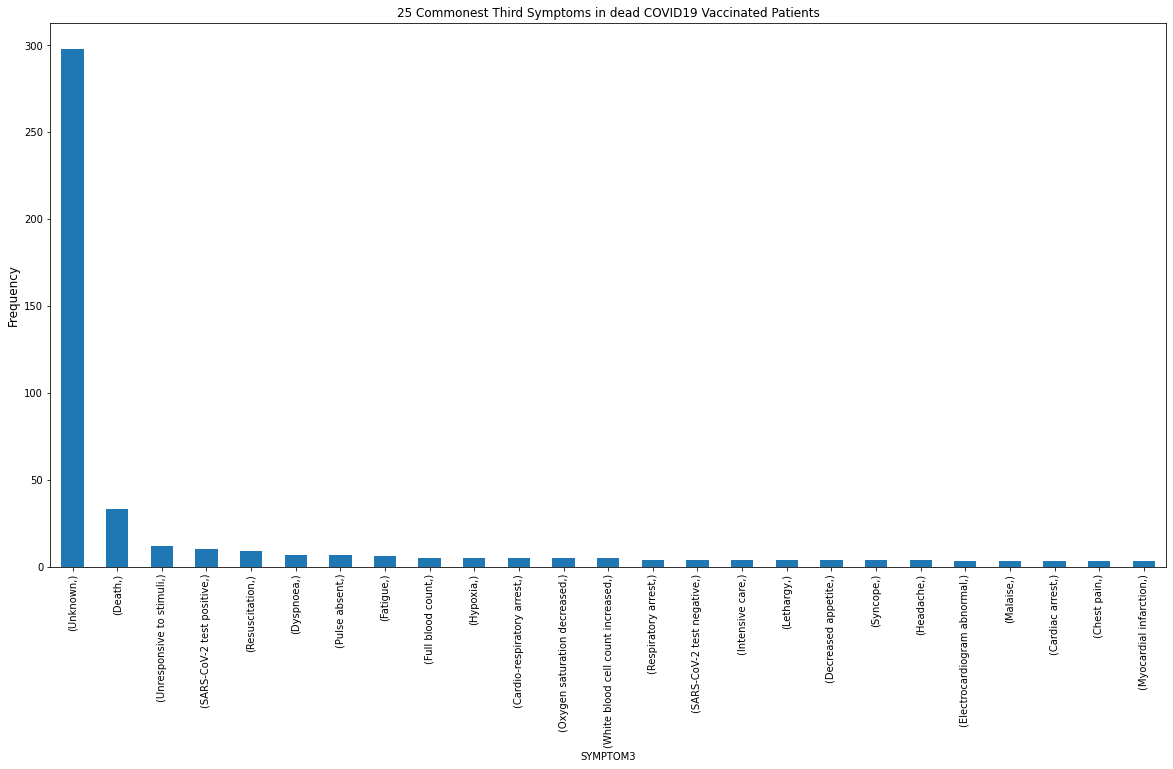

In [ ]:
 
 
nb,nam = 3, 'third'
plt.figure(figsize=(20,10))
corona_vac_df['SYMPTOM3'][corona_vac_df['SYMPTOM3']==0] = 'Unknown'
corona_vac_df[['SYMPTOM3']][new_df['DIED']==1].value_counts().head(25).plot.bar()
plt.title(f'25 Commonest {nam.capitalize()} Symptoms in dead COVID19 Vaccinated Patients')
plt.ylabel('Frequency',fontsize=12)
plt.savefig(f'commonest_{nam.lower()}_symptoms{nb}.png')

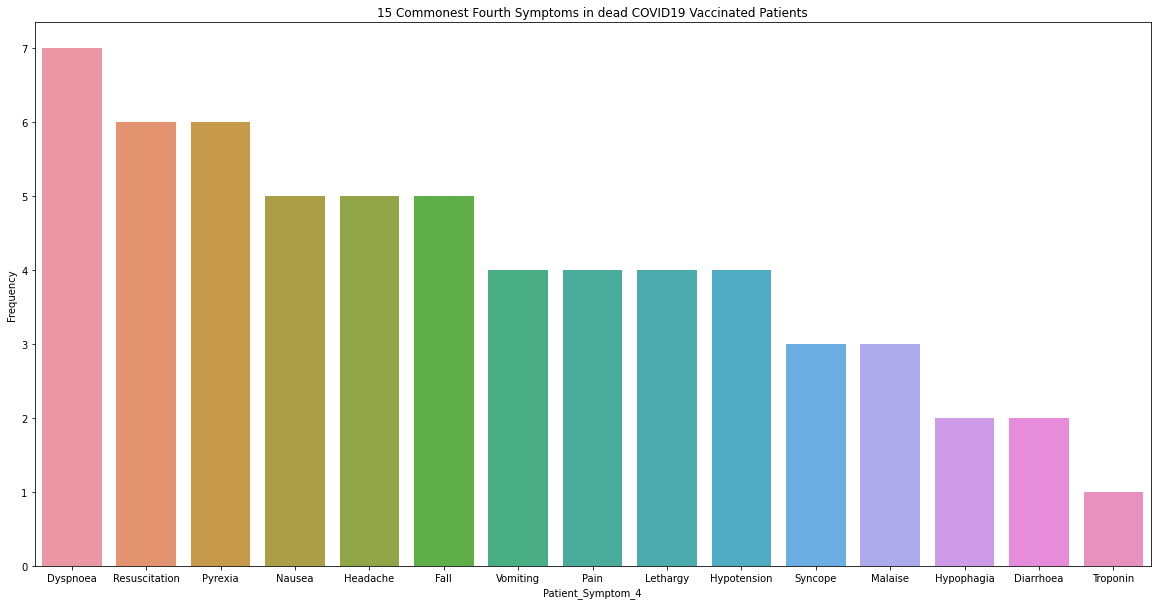

<Figure size 1152x720 with 0 Axes>

In [ ]:
 
 
nb,nam = 4, 'fourth'
plt.figure(figsize=(20,10))
sns.barplot(y='Frequency', x=f'Patient_Symptom_{nb}', data=p_sym_4_df.head(15)) 
plt.title(f'15 Commonest {nam.capitalize()} Symptoms in dead COVID19 Vaccinated Patients')
plt.figure(figsize=(16,10))
plt.savefig(f'commonest_{nam.lower()}_symptoms{nb}.png')

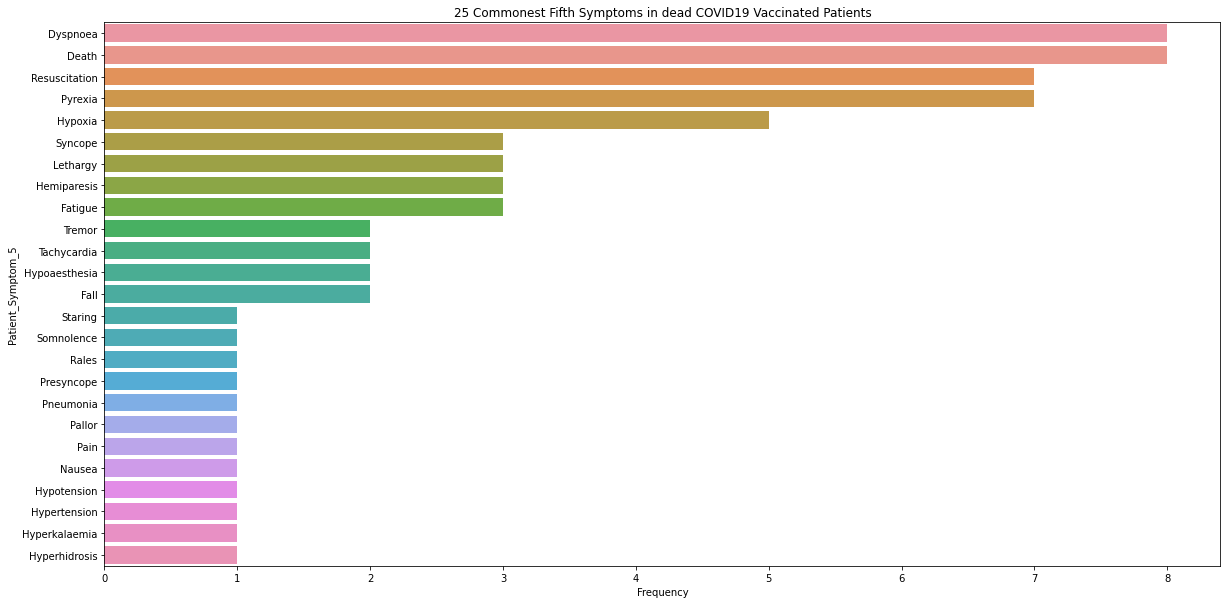

<Figure size 1152x720 with 0 Axes>

In [ ]:
 
 
nb,nam = 5, 'fifth'
plt.figure(figsize=(20,10))
sns.barplot(x='Frequency', y=f'Patient_Symptom_{nb}', data=p_sym_5_df.head(25)) 
plt.title(f'25 Commonest {nam.capitalize()} Symptoms in dead COVID19 Vaccinated Patients')
plt.figure(figsize=(16,10))
plt.savefig(f'commonest_{nam.lower()}_symptoms{nb}.png')

In [ ]:
corona_vac_df.head(2)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916710,01/01/2021,MO,23.0,23.0,0.0,0.0,0,"Acute appendicitis, onset morning of 1/1/2021 ...",0,0,1,0.0,1,0.0,0,0,0.5,12/29/2020,01/01/2021,3.0,"WBCs 13k, 4% Bands, CT with acute appendicitis...",PVT,0,Synthroid,0,Hypothyroidism,0,0,2,01/01/2021,0,0,1,NKDA,Appendicitis,23.1,Band neutrophil percentage increased,23.1,Surgery,23.1,White blood cell count increased,23.1,0,0.0,COVID19,MODERNA,0,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916741,01/01/2021,AR,68.0,68.0,0.0,0.0,0,"on dec 22 I felt some myalgias, chills, fatigu...",0,0,0,0.0,0,0.0,0,1,0.0,12/21/2020,12/22/2020,1.0,Dec 29th - saw surgeon. had xray and exam --d...,PVT,0,phenobarbital 60mg HS hydroxychloroquin 400mg...,had surgery R hand for advanced arthritis 11/1...,Rheumatoid arthritis - mostly affecting R wris...,0,0,2,01/01/2021,0,0,0,bee stings,Chills,23.1,Complex regional pain syndrome,23.1,Fatigue,23.1,Headache,23.1,Joint range of motion decreased,23.1,COVID19,PFIZER\BIONTECH,EH9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3063: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Text(0.5, 1.0, 'Commonest Routes of COVID19 Vaccine Administration')

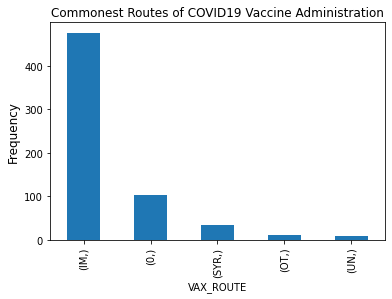

In [ ]:
#@title
#corona_vac_df.head(2)
corona_vac_df[['VAX_ROUTE']][corona_vac_df['VAX_ROUTE']==0] = 'Unknown'
corona_vac_df[['VAX_ROUTE']][new_df['DIED']==1].value_counts().head(25).plot.bar()
plt.ylabel('Frequency',fontsize=12)
plt.title('Commonest Routes of COVID19 Vaccine Administration')

#Applying Machine Learning Models
- Supervised Learning

In [ ]:
#Given a set of patient bio-data and history what are the chances
#of an adverse reaction to the Vaccine (preferably COVID19 vaccine)